In [155]:
# Set the path to the main folder
# main_folder = '/home/pgajo/working/data/metrics/1_hate_speech/metrics_monolingual/bert-base-uncased'
# main_folder = '/home/pgajo/working/data/metrics/1_hate_speech/metrics_monolingual/incel-bert-base-uncased-1000k_english'
# main_folder = '/home/pgajo/working/data/metrics/1_hate_speech/metrics_monolingual/CNN'
# main_folder = '/home/pgajo/working/data/metrics/1_hate_speech/metrics_multilingual/bert-base-multilingual-cased'
main_folder = '/home/pgajo/working/data/metrics/1_hate_speech/metrics_multilingual/incel-bert-base-multilingual-cased-1000k_multi'

(2, 3, 'Incel BERT 1M', 'train_incelsis(3642)\nhateval_train(3642)\ndavidson(3642)', 'dev_incelsis(780)', 'test_incelsis(781)')
(4, 2, 'Incel BERT 1M', 'train_incelsis(3642)\nhateval_train(3642)', 'dev_incelsis(780)', 'test_incelsis(781)')
(1, 10, 'Incel BERT 1M', 'train_hateval_2019_english(4500)\ntrain_incelsis(3642)', 'dev_incelsis(780)', 'test_incelsis(781)')
(3, 14, 'Incel BERT 1M', 'hatexplain_binary_train(9624)\ntrain_hateval_2019_english(4500)\ntrain_incelsis(3642)', 'dev_incelsis(780)', 'test_incelsis(781)')
(2, 1, 'Incel BERT 1M', 'train_incelsis(3642)\ndavidson(3642)', 'dev_incelsis(780)', 'test_incelsis(781)')
(1, 13, 'Incel BERT 1M', 'hatexplain_binary_train(9624)\ntrain_incelsis(3642)', 'dev_incelsis(780)', 'test_incelsis(781)')
(3, 16, 'Incel BERT 1M', 'df_stormfront_train(7492)\ntrain_hateval_2019_english(4500)\ntrain_incelsis(3642)', 'dev_incelsis(780)', 'test_incelsis(781)')
(4, 15, 'Incel BERT 1M', 'df_stormfront_train(7492)\ntrain_incelsis(3642)', 'dev_incelsis(780)

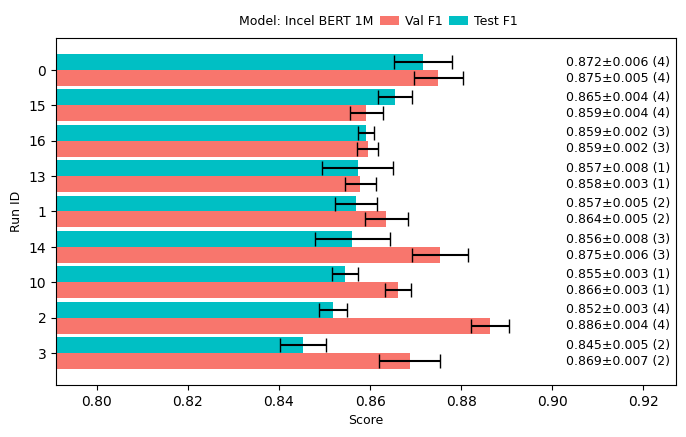

In [156]:
import os
import glob
import pandas as pd
# Create an empty list to store DataFrames
dfs = []
no_incelsis_list = [4, 5, 6, 7, 8, 9, 11, 12]
random_init_list = [-1]
# Iterate over all subfolders in the main folder
for root, dirs, files in os.walk(main_folder):
    # Iterate over all CSV files in the subfolder
    for file in glob.glob(os.path.join(root, '*.csv')):
        # # Check if the filename starts with '0'
        # if not os.path.basename(file).startswith('-1'):
        #     # Read the CSV file into a DataFrame
        
        temp_df = pd.read_csv(file)
        # Get the run_id from temp_df
        run_id = temp_df['run_id'].iloc[0]        
        if run_id not in no_incelsis_list + random_init_list:
        # if run_id in no_incelsis_list:
        # if run_id not in random_init_list:
            # Add the DataFrame to the list
            dfs.append(temp_df)
# Concatenate all DataFrames in the list
combined_df = pd.concat(dfs, ignore_index=True)
# combined_df.to_csv(os.path.join(main_folder,os.path.abspath(main_folder)+'_combined.csv')) # save merged df
combined_df['epoch'] = combined_df['epoch'].astype(int)

# Read in the original dataframe
df = combined_df

model_dict = {
    # mono
    'CNN': 'CNN',
    'bert-base-uncased': 'BERT base',
    'HateBERT': 'HateBERT',
    'bert-base-uncased-hatexplain': 'HateXplain',
    'incel-bert-base-uncased-10k_english': 'Incel BERT 10k',
    'incel-bert-base-uncased-100k_english': 'Incel BERT 100k',
    'incel-bert-base-uncased-1000k_english': 'Incel BERT 1M',
    'roberta-base': 'RoBERTa base',
    'incel-roberta-base-10k_english': 'Incel RoBERTa 10k',
    'incel-roberta-base-100k_english': 'Incel RoBERTa 100k',
    'incel-roberta-base-1000k_english': 'Incel RoBERTa 1M',
    # multi
    'bert-base-multilingual-cased': 'mBERT base',
    'incel-bert-base-multilingual-cased-10k_multi': 'Incel mBERT 10k',
    'incel-bert-base-multilingual-cased-100k_multi': 'Incel mBERT 100k',
    'incel-bert-base-multilingual-cased-1000k_multi': 'Incel mBERT 1M',
    'incel-bert-base-multilingual-cased-10k_english': 'Incel mBERT 10k EN',
    'incel-bert-base-multilingual-cased-100k_english': 'Incel mBERT 100k EN',
    'incel-bert-base-multilingual-cased-1000k_english': 'Incel mBERT 1M EN',
}

# Create a new column with the model name
df['model'] = df['model'].map(model_dict)

group_by_list = ['epoch', 'run_id', 'model', 'train_set(s)', 'dev_set(s)','test_set(s)']
# Group by model and epoch to get the average test_f1 score for each combination
grouped_df = df.groupby(group_by_list).agg({'test_f1': 'mean'})
# display(grouped_df)
# Get the epoch with the highest average test_f1 score for each model
max_epochs = grouped_df.groupby(['model', 'train_set(s)'])['test_f1'].idxmax()
# for el in max_epochs:
#     print(el)
# Create a new dataframe with rows for each model at their respective max epochs
best_epoch_df = pd.concat([combined_df[(combined_df['epoch'] == model_pair[0]) & (combined_df['model'] == model_pair[2]) & (combined_df['train_set(s)'] == model_pair[3])] for model_pair in [max_epoch for max_epoch in max_epochs]])
# Print the new dataframe
if 'train_loss' in best_epoch_df.columns:
    best_epoch_df=best_epoch_df.drop(['train_loss'], axis=1)
if 'eval_loss' in best_epoch_df.columns:
    best_epoch_df=best_epoch_df.drop(['eval_loss'], axis=1)
if 'test_loss' in best_epoch_df.columns:
    best_epoch_df=best_epoch_df.drop(['test_loss'], axis=1)
# combined_df
# display(best_epoch_df)
# Model Performance Comparison - Best Epoch for Average Test F1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = combined_df
df = best_epoch_df

# Choose the metrics to display on the bar chart
# You can modify the list below to include the desired metrics
metrics = ["val_f1",
        "test_f1",
        "val_prec",
        "test_prec",
        "val_rec",
        "test_rec"
        ]

# Group data by model and calculate the mean and standard deviation for the chosen metrics
# group_by_list = ['epoch', 'run_id']
mean_df = df.groupby(group_by_list)[metrics].mean()
std_df = df.groupby(group_by_list)[metrics].std()

# Sort the dataframes by test_f1 in descending order
mean_df = mean_df.sort_values("test_f1", ascending=True)
top_test_f1 = mean_df['test_f1'].max()
min_test_f1 = mean_df['test_f1'].min()

std_df = std_df.reindex(mean_df.index)

# Calculate the bar width and positions
num_metrics = len(metrics[0:2])
num_models = len(mean_df.index)
bar_height = 1 / (num_metrics + 2)
bar_positions = np.arange(num_models) * 2 * bar_height/0.9

# Set a fixed bar height and calculate the required figure height
fig_height = num_models * (num_metrics * bar_height) # 0.1 is added for extra spacing
    
# Create a horizontal bar chart with error bars for standard deviation
fig, ax = plt.subplots(
    figsize=(8, fig_height)  # Update the figure height based on the calculated height
)

metric_dict = {
    'val_f1': 'Val F1',
    'test_f1': 'Test F1',
    'val_prec': 'Val Prec',
    'test_prec': 'Test Prec',
    'val_rec': 'Val Rec',
    'test_rec': 'Test Rec',
    'run_id': 'ID',
    'epoch': 'Epoch',
    'test_f1_std': 'Test F1 St.Dev',
    'val_f1_std': 'Val F1 St.Dev',
    'model': 'Model',
}

model_name = mean_df.index[0][2]

for i, metric in enumerate(metrics[0:2]):
    ax.barh(
        bar_positions + i * bar_height,
        mean_df[metric],
        xerr=std_df[metric],
        height=bar_height,
        label=metric_dict[metric],
        capsize=5,
        color=['#f8766d', '#00bfc4'][i]
    )
# print(mean_df.index)

# # Remove the default yticklabels
# ax.set_yticklabels([])

# Customize the chart
ax.set_yticks(bar_positions + bar_height/2)
y_labels = [index[1] for index in mean_df.index]
ax.set_yticklabels(y_labels)  # Set y labels
ax.set_ylabel("Run ID", fontsize=9)
ax.set_xlabel("Score", fontsize=9)
plt.yticks(rotation=0)

# Calculate the minimum and maximum x values considering the error bars (std deviation)
min_x = mean_df['test_f1'].min() - std_df['test_f1'].loc[mean_df['test_f1'].idxmin()]
max_x = mean_df['test_f1'].max() + std_df['test_f1'].loc[mean_df['test_f1'].idxmax()]

# Calculate the padding (additional space) to add to the x limits
padding = (max_x - min_x) * 1.3

# Set the x limits
x_lim_max = max_x + padding
x_lim_min = min_x - padding
plt.xlim(x_lim_min, x_lim_max)

# Add model labels inside the graph with black border and white background
for i, (index, row) in enumerate(mean_df.iterrows()):
    print(index)
    # print(str(index[4]))
    # id_string = 'ID:' + str(index[1])
    epoch_string = 'Epoch:' + str(index[0])
    test_f1_string = str(round(row['test_f1'], 3)) + '±' + str(round(std_df['test_f1'].loc[index], 3)) + f' ({index[0]})'
    val_f1_string = str(round(row['val_f1'], 3)) + '±' + str(round(std_df['val_f1'].loc[index], 3)) + f' ({index[0]})'
    ypos_epoch = bar_positions[i] + bar_height/2
    xpos_epoch = min_x - padding + (- min_x + max_x + 2*padding)/100 # Adjust the x position to fit the label inside the bar

    ypos_f1_test = bar_positions[i] + bar_height
    xpos_f1_test = x_lim_max - (- min_x + max_x + 2*padding)/100 # Adjust the x position to fit the label inside the bar

    ypos_f1_val = bar_positions[i]
    xpos_f1_val = x_lim_max - (- min_x + max_x + 2*padding)/100 # Adjust the x position to fit the label inside the bar

    # epoch text
    # ax.text(
    #     xpos_epoch,
    #     ypos_epoch,
    #     epoch_string,
    #     ha="left",
    #     va="center",
    #     fontsize=9,
    #     # bbox=dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor=facecolor),
    # )

    # f1 val text
    ax.text(
        xpos_f1_val,
        ypos_f1_val,
        val_f1_string,
        ha="right",
        va="center",
        fontsize=9,
    )

    # f1 test text
    ax.text(
        xpos_f1_test,
        ypos_f1_test,
        test_f1_string,
        ha="right",
        va="center",
        fontsize=9,
    )

h, l = ax.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]] # Canvas
handles = ph + h
labels = [f"Model: {model_name}"] + l  # Merging labels
plt.legend(handles, labels,ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=9, frameon=False, columnspacing=0.5, handletextpad=0.5, handlelength=1.5)

# plt.title(f"{model_name} - Best Epoch for Mean Test F1", fontsize=9)
plt.show()

In [ ]:
# Extract val_f1, test_f1, and their standard deviations
summary_df = mean_df[['val_f1', 'test_f1', 'val_rec', 'val_prec', 'test_rec', 'test_prec']].copy()
summary_df['val_f1_std'] = std_df['val_f1']
summary_df['test_f1_std'] = std_df['test_f1']

# Reset index
summary_df = summary_df.reset_index()

# Display the DataFrame
chart_filename = '/home/pgajo/working/images_tables/1_hate_speech/multilingual_setting/incel-mbert-1M-base-all-incelsis-ids.png'
csv_filename = chart_filename.replace('.png', '.csv')

csv_headers = ['run_id', 'epoch', 'model', 'val_f1', 'val_f1_std', 'val_rec', 'val_prec', 'test_f1', 'test_f1_std', 'test_rec', 'test_prec']

summary_df = summary_df[csv_headers].sort_values('test_f1', ascending=False)
display(summary_df)
print('df_save_path', csv_filename)

In [ ]:
summary_df.to_csv(csv_filename, index=False)

# Convert dataframe to latex

In [ ]:
latex_filename = chart_filename.replace('.png', '.tex')

for header in csv_headers:
    if header not in metric_dict.keys():
        metric_dict[header] = header

csv_header_names = [metric_dict[header] for header in csv_headers]
summary_df.columns = csv_header_names

# df_csv = df_csv.sort_values("test_f1", ascending=False)
display(summary_df)
print(latex_filename)

In [ ]:
summary_df.round(3).to_latex(latex_filename, index=False)